In [ ]:
import pandas as pd
import numpy as np
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]



In [ ]:

spotify_data_cleaned.dtypes

track_id                      object
track_name                    object
track_artist                  object
track_popularity               int64
track_album_id                object
track_album_name              object
playlist_name                 object
playlist_id                   object
playlist_genre                object
playlist_subgenre             object
danceability                 float64
energy                       float64
key                            int64
loudness                     float64
mode                           int64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
duration_ms                    int64
track_album_release_month     object
track_album_release_year      object
dtype: object

In [ ]:
#bon en vrai ca marche bien pour 100 mais pas pour tous mais flemme de faire une belle fonction mdr on verra si on a le temps
def spotify_data_short(nbTrackByGenre):
    spotify_data_short = pd.concat((spotify_data_cleaned[5000:5000+nbTrackByGenre],spotify_data_cleaned[10000:10000+nbTrackByGenre],spotify_data_cleaned[15000:15000+nbTrackByGenre],spotify_data_cleaned[20000:20000+nbTrackByGenre],spotify_data_cleaned[25000:25000+nbTrackByGenre]), axis=0)
    return spotify_data_short
    short = spotify_data_short(100)

In [ ]:
short = spotify_data_short(100)

<AxesSubplot:xlabel='playlist_genre', ylabel='count'>

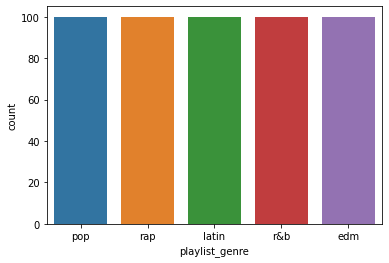

In [ ]:
import seaborn as sns
sns.countplot(x=short.playlist_genre)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>